# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# ensuring that the graphs  are displayed within the notebook without "calling" them specifically.

%matplotlib inline

In [3]:
# turning a project folder path into a string

path = r'/Users/mart/Documents/09-2022 IBRD  Statement of Loans'

# Importing database

df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'SoL.pkl'))

# set options to show all columns

pd.set_option('display.max_columns', None)

# check the first rows

df.head()

,Loan Number,Region,Country,Borrower,Guarantor,Loan Type,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrowers Obligation,Loans Held,Agreement Signing Date,Effective Date (Most Recent),Closed Date (Most Recent)
0,IBRD00010,EUROPE AND CENTRAL ASIA,France,CREDIT NATIONAL,France,NPL,Fully Repaid,4.25,250000000.0,0.0,0.0,250000000.0,38000.00,0.0,0.0,0.0,0.0,1947-05-09,1947-06-09,1947-12-31
5,IBRD00050,LATIN AMERICA AND CARIBBEAN,Chile,Ministry of Finance,Chile,NPL,Fully Repaid,4.50,13500000.0,0.0,0.0,13500000.0,12167000.00,0.0,0.0,0.0,0.0,1948-03-25,1949-04-07,1954-12-31
6,IBRD00060,LATIN AMERICA AND CARIBBEAN,Chile,Ministry of Finance,Chile,NPL,Fully Repaid,3.75,2500000.0,0.0,0.0,2500000.0,755000.00,0.0,0.0,0.0,0.0,1948-03-25,1949-04-07,1950-01-01
13,IBRD00111,LATIN AMERICA AND CARIBBEAN,Brazil,Ministério da Fazenda,Brazil,NPL,Fully Repaid,4.50,75000000.0,0.0,0.0,75000000.0,70971588.97,0.0,0.0,0.0,0.0,1949-01-27,1949-05-09,1953-12-31
14,IBRD00112,LATIN AMERICA AND CARIBBEAN,Brazil,Ministério da Fazenda,Brazil,NPL,Fully Repaid,4.25,15000000.0,0.0,0.0,15000000.0,15000000.00,0.0,0.0,0.0,0.0,1951-01-18,1951-04-10,1954-12-31


# Data checks

In [4]:
df.columns

Index(['Loan Number', 'Region', 'Country', 'Borrower', 'Guarantor',
       'Loan Type', 'Loan Status', 'Interest Rate',
       'Original Principal Amount', 'Cancelled Amount', 'Undisbursed Amount',
       'Disbursed Amount', 'Repaid to IBRD', 'Due to IBRD',
       'Exchange Adjustment', 'Borrowers Obligation', 'Loans Held',
       'Agreement Signing Date', 'Effective Date (Most Recent)',
       'Closed Date (Most Recent)'],
      dtype='object')

In [5]:
# checking for missing values

df.isnull().sum()

Loan Number                     0
Region                          0
Country                         0
Borrower                        0
Guarantor                       0
Loan Type                       0
Loan Status                     0
Interest Rate                   0
Original Principal Amount       0
Cancelled Amount                0
Undisbursed Amount              0
Disbursed Amount                0
Repaid to IBRD                  0
Due to IBRD                     0
Exchange Adjustment             0
Borrowers Obligation            0
Loans Held                      0
Agreement Signing Date          0
Effective Date (Most Recent)    0
Closed Date (Most Recent)       0
dtype: int64

In [6]:
# checking for duplicates

df_dups = df[df.duplicated()]
df_dups

,Loan Number,Region,Country,Borrower,Guarantor,Loan Type,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrowers Obligation,Loans Held,Agreement Signing Date,Effective Date (Most Recent),Closed Date (Most Recent)


## Extreme values checks

/Users/mart/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest Rate', ylabel='Density'>

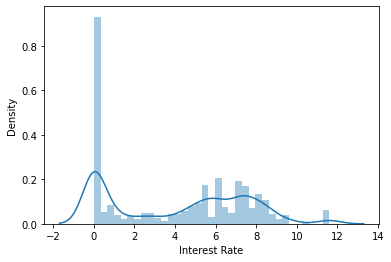

In [8]:
sns.distplot(df['Interest Rate'], bins=35)

In [9]:
# Check the mean
df['Interest Rate'].mean()

4.075409939220572

In [10]:
# Check the median

df['Interest Rate'].median()

4.85

In [11]:
# Check the max

df['Interest Rate'].max()

11.6

# Data prep for regression analysis

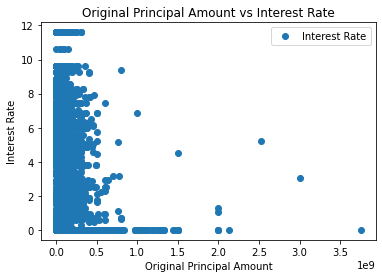

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

df.plot(x = 'Original Principal Amount', y='Interest Rate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Original Principal Amount vs Interest Rate')  
plt.xlabel('Original Principal Amount')  
plt.ylabel('Interest Rate')  
plt.show()

## Hypothesis

As the Original Principal Amount increases, the Interest Rate decreases. 

## Reshaping the variables into NumPy arrays

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Original Principal Amount'].values.reshape(-1,1)
y = df['Interest Rate'].values.reshape(-1,1)

In [14]:
X

array([[2.50e+08],
       [1.35e+07],
       [2.50e+06],
       ...,
       [5.00e+07],
       [5.00e+06],
       [1.00e+07]])

In [16]:
y

array([[4.25],
       [4.5 ],
       [3.75],
       ...,
       [8.25],
       [8.25],
       [9.25]])

In [17]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [18]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

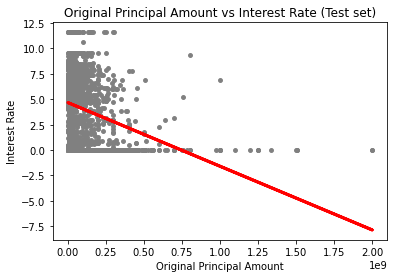

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Original Principal Amount vs Interest Rate (Test set)')
plot_test.xlabel('Original Principal Amount')
plot_test.ylabel('Interest Rate')
plot_test.show()

- The data points are dispersed widely around the regression line.

In [22]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.26915961e-09]]
Mean squared error:  10.588772364903196
R2 score:  0.09240909079513393


- The slope is showing us that as X (Original Principal Amount) rises, y (the Interest Rates ) decreses at a degree of -0,6269.
- The MSE is large at 10.5887, which means that regression is not the best model to represent this data and can’t accurately predict the influence of the Original Principal Amount on the Interest Rate.
- The R2 score of 0.092 indicates that the model does not adequately explain the variance.

In [24]:
y_predicted

array([[4.46460121],
       [3.42830913],
       [4.61944945],
       ...,
       [4.49406626],
       [4.58630342],
       [4.58810366]])

In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.26,4.464601
1,7.50,3.428309
2,7.00,4.619449
3,0.00,4.650795
4,8.20,4.431375
5,8.20,4.368683
6,5.59,4.675088
7,0.00,1.641599
8,7.90,4.462720
9,0.00,3.428309


## Compare how the regression fits the training set

In [26]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.26915961e-09]]
Mean squared error:  10.816600026842089
R2 score:  0.092641336217678


- The coefficient is negative, the MSE is high, and the R2 score is low, with all the values being almost identical compared to the model ones.
- It turns out that the hypothesis, “As the Original Principal Amount increases, the Interest Rate decreases”, is only partially true.
- While the Interest Rate is decreasing with the increase of the Original Principal Amount, it's not the only factor affecting it.

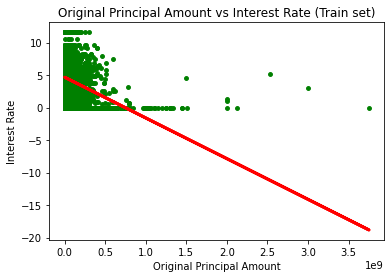

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Original Principal Amount vs Interest Rate (Train set)')
plot_test.xlabel('Original Principal Amount')
plot_test.ylabel('Interest Rate')

plot_test.show()

# Bonus: Performance improvement after removing outliers

In [32]:
# removing zeroes from the the "Borrowers Obligation" variable 

df_test = df[(df['Interest Rate'] > 0) & (df['Interest Rate'] <= 9)] 

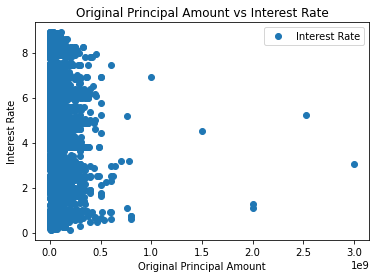

In [33]:
# See how the scatterplot looks without outliers

df_test.plot(x = 'Original Principal Amount', y='Interest Rate', style='o')  
plt.title('Original Principal Amount vs Interest Rate')  
plt.xlabel('Original Principal Amount')  
plt.ylabel('Interest Rate')  
plt.show()

In [34]:
# Reshape again

X_2 = df_test['Original Principal Amount'].values.reshape(-1,1)
y_2 = df_test['Interest Rate'].values.reshape(-1,1)

In [35]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [36]:
# Run and fit the regression

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [37]:
# Predict

y_predicted_2 = regression.predict(X_test_2)

In [38]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-5.50293225e-09]]
Mean squared error:  5.452492175476121
R2 score:  0.015620940043473364


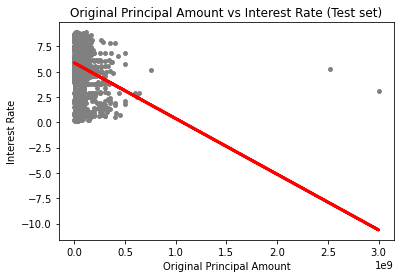

In [40]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Original Principal Amount vs Interest Rate (Test set)')
plot_test.xlabel('Original Principal Amount')
plot_test.ylabel('Interest Rate')
plot_test.show()

In [41]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,2.10,3.129972
1,4.85,4.974855
2,6.25,5.840166
3,6.40,5.744232
4,5.75,5.858325
5,7.00,5.842917
6,7.00,5.815402
7,3.75,5.811000
8,7.25,5.760373
9,6.03,5.810367


- Deleting zeros and outliers didn't have a big impact on the model's accuracy.
- By excluding extreme values we might be biasing real situation so we should be carfule about it.